**Econ691-06 | Hanh Nong**
# <center>ASSIGNMENT 2</center>

In [10]:
#setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sfa
from statsmodels.iolib.summary2 import summary_col
from scipy import stats
import seaborn as sns

## Problem 1: Heterogeneous Treatment Effects

The dataset for this homework comes from an actual survey in the US, where participants were randomly asked one of two questions with similar wording. Assume the randomization scheme was as follows: a coin was flipped prior to each participant being surveyed to determine treatment. The wording is as follows:

    We are faced with many problems in this country, none of which can be solved easily or inexpensively. I'm going to name some of these problems, and for each one I'd like you to tell me whether you think we're spending too much money or too little money on it. Are we spending too much, too little, or about the right amount on (assistance to the poor/welfare)?

The treatment is choosing the wording - "assistance to the poor" (1) versus "welfare" (0). The response is that the person surveyed thinks the government spends too much (1) versus too little (0). This data, along with two covariates (age and party preference, for hypothetical parties A - I), can be found in the file data_assignment2_1.csv.

In [11]:
#load data
data1 = pd.read_csv("data_assignment2_1.csv")
data1.head()

,response,treatment,age,party
0,0,0,28.0,d
1,1,0,54.0,g
2,1,0,44.0,a
3,0,0,77.0,a
4,0,0,44.0,a


### 1. (10 points)
**We suspect there is treatment heterogeneity in age, with older participants (those 50 or older) differing from younger participants (49 and below). Prove or disprove this hypothesis; and explain in words what this means about support for assistance to the poor/welfare for the elderly versus young.**

If there is no treatment heterogeneity in age, then the treatment effect would be the same for every age. Linear regression on variables *treatment*, *age* and the interaction of *treatment* and *age* can tell whether there is heterogeneity or not.

First, introduce new binary variable which indicates whether the participants are 50 up or not.

In [12]:
data1['fiftyup'] = (data1['age'] >=50).astype(int)
data1.head()

,response,treatment,age,party,fiftyup
0,0,0,28.0,d,0
1,1,0,54.0,g,1
2,1,0,44.0,a,0
3,0,0,77.0,a,1
4,0,0,44.0,a,0


Regression results are as below:

In [13]:
reg1 = sfa.ols("response ~ treatment + fiftyup + treatment*fiftyup", data = data1).fit(cov_type='HC1')
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     2057.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:32:06   Log-Likelihood:                -18180.
No. Observations:               36501   AIC:                         3.637e+04
Df Residuals:                   36497   BIC:                         3.640e+04
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4372      0.00

The coefficients for *fiftyup* and *treatment * fiftyup* are statistically significant. The treatment effect for age 50 up is -0.31 while it's -0.35 for the younger group. The standard errors on *treatment* coefficient and *treatment * fiftyup* coefficient are both very small. The treatment has different effect on different age group. When asked about opinion on "assistance to the poor", older ages increase the probability of responding "too much" compared to younger ages. That could also mean the older group's support for "assistance to the poor" is less favourable than younger group's

### 2. (5 points) 
**Repeat this same process, but using age as a continuous rather than discrete variable. Do your conclusions change?**

In [14]:
reg2 = sfa.ols("response ~ treatment + age + treatment*age", data = data1).fit(cov_type='HC1')
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     2064.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:32:52   Log-Likelihood:                -18127.
No. Observations:               36388   AIC:                         3.626e+04
Df Residuals:                   36384   BIC:                         3.630e+04
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4413      0.011     41.336

For this model, we can only conclude that as a person get older, the treatment effect is less negative, aka less likely to respond "too much" when asked about "assistance to the poor". However, it doesnn't specifically imply the difference between two age groups. It actually shows the treatment effect for a specific age rather than the difference. Hence, the t-test for the *treatment x age* coefficient can't be used to make conclusion on the significance of the difference in treatment effect. Moreover, the coefficient of *treatment * age* is very small compared to the *treatment* coefficient. The difference in treatment effect between ages hence is very minimal and hardly recognized.

### 3. (10 points) 
**We similarly suspect there is treatment heterogeneity in party preference. Prove or disprove this hypothesis; but be mindful of the higher dimensionality of the problem and implement a solution accordingly.**

Split the data into two group. Run regression on group 1 to identify heterogeneity and group 2 to measure its effect

In [15]:
#Split data into 2 groups:
index_1 = np.random.choice(range(len(data1)), round(len(data1)/2), replace = False)

Results of regression on group 1 is as below. Coefficients of *treatment x party* are statistically significant (p-value <0.05) where parties are b, e, f & g and not significant for parties c, d, h, & i. There is heterogeneity among parties b, e, f & g but not among parties c, d, h & i. The second regression show the heterogeneity effect. 

    treatment:party[T.b]    -0.0467
    treatment:party[T.e]    -0.1318
    treatment:party[T.f]    -0.1415
    treatment:party[T.g]    -0.1662 

Since the result of having heterogeneity is not consistent among all parties, it's hard to conclude that there is treatment heterogeneity in party preference.

In [16]:
reg3_1 = sfa.ols("response ~ treatment + party + treatment*party", data = data1.iloc[index_1]).fit(cov_type='HC1')
print(reg3_1.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     248.3
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:33:05   Log-Likelihood:                -8764.2
No. Observations:               18250   AIC:                         1.756e+04
Df Residuals:                   18232   BIC:                         1.771e+04
Df Model:                          17                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2866 

In [17]:
reg3_2 = sfa.ols("response ~ treatment + party + treatment*party", data = data1.drop(index_1)).fit(cov_type='HC1')
print(reg3_2.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     240.6
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:33:08   Log-Likelihood:                -8751.3
No. Observations:               18251   AIC:                         1.754e+04
Df Residuals:                   18233   BIC:                         1.768e+04
Df Model:                          17                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3195 

## Problem 2: Non-Compliance

Suppose you are a data scientist at DoorDash, and you implement a new feature - linking of Venmo accounts to pay for meals - to increase revenue. You run a large experiment to test its impact in a given city, with an equal-sized treatment and control group. You want to understand the effect of linking the account on revenue. Of course, you cannot force users to link their accounts, and so that form of non-compliance will have to be handled.

The data following the experiment is in the file data_assignment2_2.csv. The file has 200,000 rows. Each row corresponds to a separate user, for which there are seven columns. Six of the columns are collected at the time of the experiment: revenue brought in by the user, an indicator for whether the user is in the treatment group (where 1 indicates treatment), an indicator for whether the user actually complied with the treatment (i.e. linked their Venmo account, where 1 indicates compliance), the age of the user, the gender of the user (male, female, or other), and the geographic zone (numbered one through eight) of the user in the city. The seventh column ("signal") should be put aside for now, and will be incorporated into the question later.

In [18]:
#load data
data2 = pd.read_csv("data_assignment2_2.csv")
data2.head()

,revenue,treatment,compliance,age,gender,zone,signal
0,6.878037,1,0,27,m,2,0.071595
1,16.911885,1,0,62,o,4,0.162294
2,24.212034,1,0,31,f,2,0.099369
3,11.106823,1,0,42,m,7,-0.080129
4,22.507852,1,0,44,m,4,0.150118


### 1. (5 points) 
**Compute the estimate as given by the as-treated and per-protocol estimator. Explain in one sentence the assumption that both embed, and show using the data that this assumption is likely invalid.**

In [19]:
print("Number of compliers in control group:",data2.query("treatment == 0")['compliance'].sum())

Number of compliers in control group: 0


In [20]:
#Compute estimate
astreated = (data2.query("compliance == 1")['revenue'].mean() -
             data2.query("compliance == 0")['revenue'].mean())
print("Estimate by as-treated method:",round(astreated,2))

Estimate by as-treated method: 5.52


In [21]:
#Compute estimate
perprotocol = (data2.query("compliance == 1")['revenue'].mean() -
               data2.query("treatment == 0")['revenue'].mean())
print("Estimate by per-protocol method:",round(perprotocol,2))

Estimate by per-protocol method: 5.48


Both as-treated and per-protocol assume there is no selection bias in taking treatment. As shown below, 93% of treatment group is non-compliers. Before experiment, treatment and control groups are equal. Excluding 93% of treatment group or combining 93% of treatment group to control group:
- lead to great imbalance between two groups.
- actually reassign treatment depend on potential outcomes

In [22]:
#Data show assumption invalid
print("Total units in treatment group:",data2.query("treatment == 1").shape[0])
print("Percentage of non-compliers in treatment group:",
      round(100-data2.query("treatment == 1")['compliance'].mean()*100,2),"%")

print("\nOriginal Treatment/Control ratio:",
      round(len(data2.query("treatment == 1"))*100/len(data2)),"/", 
      round(len(data2.query("treatment == 0"))*100/len(data2)))

print("Treatment/Control ratio in as-treated:",
      round(data2['compliance'].mean()*100),"/", 
      100 - round(data2['compliance'].mean()*100))

print("Treatment/Control ratio in per-protocol:",
      round(len(data2.query("compliance == 1"))*100/len(data2.query("compliance == 1 | treatment == 0"))),"/", 
      round(len(data2.query("treatment == 0"))*100/len(data2.query("compliance == 1 | treatment == 0"))))

Total units in treatment group: 100000
Percentage of non-compliers in treatment group: 93.44 %

Original Treatment/Control ratio: 50 / 50
Treatment/Control ratio in as-treated: 3 / 97
Treatment/Control ratio in per-protocol: 6 / 94


### 2. (10 points) 
**Compute the estimate as given by the intent-to-treat estimator and Wald estimator. In one sentence each, explain exactly what each number measures. Explain in one further sentence why they differ from each other.**

**Intent-to-treat** measures the difference between average of outcomes in treatment group and average of outcomes in control group

In [23]:
#Compute estimate
ittr = (data2.query("treatment == 1")['revenue'].mean() -
        data2.query("treatment == 0")['revenue'].mean())
print("Estimate by intent-to-treat method:",round(ittr,2))

Estimate by intent-to-treat method: 0.28


**Wald** calculates the difference for those who actually comply to the treatment

In [24]:
#Compute estimate
wald = ittr/data2.query("treatment == 1")['compliance'].mean()
print("Estimate by Wald method:",round(wald,2))

Estimate by Wald method: 4.31


Intent-to-treat differs from Wald since Wald takes into account the proportion of those who actually receive the treatment while intent-to-treat perceive those who are in treatment group as those who receive treatment.

### 3. (5 points) 
**Compute the standard deviation of the Wald estimate using the bootstrap. As always, be very clear about precisely how you performed the bootstrap, and why you chose to do it that way.**

Bootstrap approach: there are exactly 100k units in treatment group and 100k units in control group. I believe this split is intentional and hence bootstrap will keep this same split.

In [25]:
#Get number of units in each group and number of compliers in each group.
n_treatment = int(data2['treatment'].sum())
n_control = int(len(data2) - n_treatment)
N = [n_treatment, n_control]

In [26]:
#Set up bootstrap sample function
#Bootstrap approach: exact number of units in treatment and control. ~7% of compliers in treatment group
def bstr_sample(data, N):   
    index_treatment = np.random.choice(np.where(data['treatment'] == 1 )[0], 
                                           replace = True, size = N[0])

    index_control = np.random.choice(np.where(data['treatment'] == 0)[0], 
                                         replace = True, size = N[1])

    sample = pd.concat([data.iloc[index_treatment], 
                        data.iloc[index_control]], 
                       ignore_index=True, sort=False)
    return sample

In [27]:
#Run bootstrap
wald_bstr = []

for i in range(100):
    sample = bstr_sample(data2, N)
    ittr_bstr = sample.query('treatment == 1')['revenue'].mean() - sample.query('treatment == 0')['revenue'].mean()
    wald_bstr.append(ittr_bstr/sample.query("treatment == 1")['compliance'].mean())

In [28]:
print("Mean of bootstrap, Wald estimator:",round(np.mean(wald_bstr),4))
print("std of bootstrap, Wald estimator:",round(np.std(wald_bstr),4))

Mean of bootstrap, Wald estimator: 4.3073
std of bootstrap, Wald estimator: 0.4487


### 4. 

**Using the variables given (excluding "signal"), construct the estimate as given by the weighted Wald estimator. There are three key steps:**

**4(a) (10 points) First, predict compliance across the entire sample using all pre-experimental variables. To predict compliance, you'll first have to build a model, using your treatment group to train. Explain why we use only the treatment group as the training set, and further explain any other choices you make while constructing the model. Note that full
credit will be awarded to linear regression models, but you are welcome to pick any more complicated class of models (e.g. logistic regression, random forest, etc) if curious.**

In this dataset, compliance's data only present in treatment group, not control group. If we use control group to build a model to predict compliance, this model is useless as it cannot predict compliance. Treatment group has 7% of units are compliers. Hence it is more appropriate to use treatment group as training set.

Construction of model:
- Linear regression is used for simplicity. Variables included in the regression are: age, gender and zone. These variables exist before experiment, hence can be consider pre-experiment.
- To avoid training and predicting on the same observation, treatment group is split into 2 training sets: treatment1 and treatment2. Two is good enought as compliance proportion is just 7%. Splitting treatment group into more training sets would reduce the number of compliers in each training sets, and hence could affect the model's performance.
- Now having two models, control group is also split into 2: control1 and control2. This will ensure equal number of predicted units for each model.
- Run regression on treatment1 and use it to predict for treatment2, control2
- Run regression on treatment2 and use it to predict for treatment1, control1
- The results of the models are not binary and could be out of range (0,1) since this is linear regression. However, the purpose of building these model is to assign weight based on the compliance prediction. Normally, sigmoid should be used to return the model's prediction to probability. However, since these weights present in both numerator and denominator in the weighted Wald estimator, it's not necessary to turn the results into probability.

In [29]:
print("Number of compliers in control group:",data2.query("treatment == 0")['compliance'].sum())

Number of compliers in control group: 0


The below function is set up to assign weights for each unit in data:
- split treatment and control groups into 4 groups. All groups have the same number of units and are not duplicated
- run linear regression as define above
- use model's prediction to assign weight for each unit in data.

In [30]:
#Set up function to predict weight: SHORT VERSION
def predict_weight(data, reg, ind_var, reg_formula = "", reg_model1 = "", reg_model2 = ""):
    #reg = 0: regression at each iteration only. 
    #reg = 1: use fixed model only. input reg_model1, reg_model2
    #reg = 2: use both
    
    #Split data into 4 groups:
    index_treatment1 = np.random.choice((np.where(data['treatment'] == 1)[0]), round(n_treatment/2), replace = False)
    index_treatment2 = data.drop(index_treatment1).query("treatment == 1").index
    index_control1 = np.random.choice((np.where(data['treatment'] == 0)[0]), round(n_control/2), replace = False)
    index_control2 = data.drop(index_control1).query("treatment == 0").index
    
    #Run regression at each iteration (reg =0):
    if (reg == 0) | (reg == 2):
        reg_1 = sfa.ols(reg_formula, data = data.iloc[index_treatment1]).fit(cov_type='HC1')
        reg_2 = sfa.ols(reg_formula, data = data.iloc[index_treatment2]).fit(cov_type='HC1')

        #Use model trained on treatment 1 to predict weight on treatment 2 and control 2:
        data.loc[index_treatment2,'weight'] = reg_1.predict(data.loc[index_treatment2, ind_var])
        data.loc[index_control2,'weight'] = reg_1.predict(data.loc[index_control2, ind_var])     

        #Use model trained on treatment 2 to predict weight on treatment 1 and control 1:
        data.loc[index_treatment1,'weight'] = reg_2.predict(data.loc[index_treatment1, ind_var])
        data.loc[index_control1,'weight'] = reg_2.predict(data.loc[index_control1, ind_var])  


    #If select approach to use a fixed model (aka reg = 1):
    if (reg == 1) | (reg == 2):
        #Use model trained on treatment 1 to predict weight on treatment 2 and control 2:
        data.loc[index_treatment2, 'weight_fm'] = reg_model1.predict(data.loc[index_treatment2,ind_var])
        data.loc[index_control2, 'weight_fm'] = reg_model1.predict(data.loc[index_control2, ind_var])
        
        #Use model trained on treatment 2 to predict weight on treatment 1 and control 1:
        data.loc[index_treatment1, 'weight_fm'] = reg_model2.predict(data.loc[index_treatment1, ind_var])
        data.loc[index_control1, 'weight_fm'] = reg_model2.predict(data.loc[index_control1, ind_var])
        
    return data, index_treatment1, index_treatment2

The below function is set up to calculate weighted Wald estimator:

In [31]:
#Set up function to calculate weighted Wald estimator:
def weighted_wald(data, weight_col, outcomes_col, compliance_col):
    outcomes_wght = data[outcomes_col]*data[weight_col]
    ittr_wght = (np.mean(outcomes_wght[np.where(data['treatment'] == 1)[0]]) - 
                 np.mean(outcomes_wght[np.where(data['treatment'] == 0)[0]]))
    wald_wght = (ittr_wght/
                 np.mean((data[compliance_col]*data[weight_col])[np.where(data['treatment'] == 1)[0]]))
    
    return wald_wght

**4(b) (5 points) Second, using these predictions as the weights, compute estimate as given by the weighted Wald estimator. Remember that the weighted Wald estimator is just the Wald estimator, except each term in the numerator and denominator is multiplied by weights.**

In [32]:
reg_formula = "compliance ~ age + gender + zone"
ind_var = ['age', 'gender', 'zone']

# predict_weight(data, reg, reg_model1 = None, reg_model2 = None, reg_formula = None, ind_var = None):

result = predict_weight(data = data2.copy(), reg = 0, reg_formula = reg_formula, ind_var = ind_var)

reg4_1 = sfa.ols(reg_formula, data = result[0].iloc[result[1]]).fit(cov_type='HC1')
reg4_2 = sfa.ols(reg_formula, data = result[0].iloc[result[2]]).fit(cov_type='HC1')

wald_wght = weighted_wald(data = result[0],
                          weight_col = 'weight',
                          outcomes_col = 'revenue',
                          compliance_col = 'compliance')

print("Estimate by Weighted Wald method, simple model:",round(wald_wght,4))

Estimate by Weighted Wald method, simple model: 4.1115


**4(c) (10 points) Third, the standard deviation of the weighted Wald estimator by bootstrapping. There are two approaches: you can construct a new model for each bootstrap iteration, or you can hold your original model fixed. Discuss the tradeoffs between these two approaches. You may implement either one for full credit.**

In the code below, functions *bstr_sample* is set up in question 3, *predict_weight* and *weighted_wald* are set up in question 4(a)

In [33]:
wald_wght_bstr1 = []
wald_wght_bstr2 = []

for i in range(100):
    #select sample with bootstrap:
    sample_wght = bstr_sample(data2, N)
    
    #predict weight:
    sample_wght = predict_weight(data = sample_wght, reg = 2, 
                                 reg_formula = reg_formula, reg_model1 = reg4_1, reg_model2 = reg4_2, 
                                 ind_var = ind_var)[0]
    
    #calculate Weighted Wald, using regression at each iteration:
    wald_wght_bstr1.append(weighted_wald(data = sample_wght, 
                                         weight_col = 'weight', 
                                         outcomes_col = 'revenue', 
                                         compliance_col = 'compliance'))
    
    #calculate Weighted Wald, using fixed models for all iteration - models reg4_1 & reg4_2 from question 4(b):
    wald_wght_bstr2.append(weighted_wald(data = sample_wght, 
                                         weight_col = 'weight_fm', 
                                         outcomes_col = 'revenue', 
                                         compliance_col = 'compliance'))

In [34]:
sample_wght.head()

,revenue,treatment,compliance,age,gender,zone,signal,weight,weight_fm
0,25.238724,1,0,65,m,3,0.024422,0.026719,0.026817
1,18.192236,1,0,37,m,5,0.144485,0.061504,0.064573
2,14.802337,1,0,46,o,5,-0.093538,0.040097,0.042783
3,16.913906,1,0,38,m,2,0.127396,0.135532,0.137332
4,24.046640,1,1,25,m,3,1.014717,0.146023,0.150377


In [35]:
print("Mean of Weighted Wald estimator from bootstrap with regression at each iteration:",round(np.mean(wald_wght_bstr1),4))
print("Std of Weighted Wald estimator from bootstrap with regression at each iteration:",round(np.std(wald_wght_bstr1),4))

print("\nMean of Weighted Wald estimator from bootstrap with fixed model:",round(np.mean(wald_wght_bstr2),4))
print("Std of Weighted Wald estimator from bootstrap with regression at each iteration:",round(np.std(wald_wght_bstr2),4))

Mean of Weighted Wald estimator from bootstrap with regression at each iteration: 4.0969
Std of Weighted Wald estimator from bootstrap with regression at each iteration: 0.6433

Mean of Weighted Wald estimator from bootstrap with fixed model: 4.0952
Std of Weighted Wald estimator from bootstrap with regression at each iteration: 0.6406


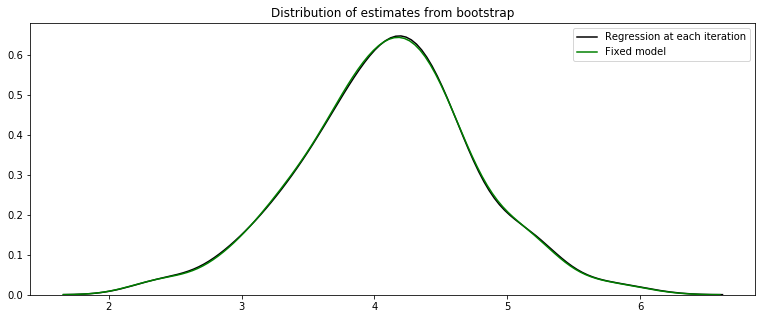

In [36]:
plt.figure(figsize = (13,5))
sns.kdeplot(wald_wght_bstr1, color = 'black', label = "Regression at each iteration")
sns.kdeplot(wald_wght_bstr2, color = 'green', label = "Fixed model")
plt.title("Distribution of estimates from bootstrap")
plt.show()

There's not much difference between the two approaches in terms of mean and std. Regression at each iteration will update the model each time and hence the models will fit to train data at each iteration more than fixed models. However, given the large sample size and number of iteration, eventually, results of both approaches will be very closed to each other. The downside of running regression at each iteration is cost. This could slow down the process if the model is more complicated and the sample size is much larger than this.

### 5. 
**Now let's introduce the last variable, signal. A data scientist at DoorDash tells you that she has found a high-quality predictor of compliance, called signal.** 

**5(a) (10 points) First, using this new variable along with all original variables, build a new model to predict compliance, generate a new weighted Wald estimate, and generate new standard errors by bootstrap.**

Build new model and generate new weighted Wald estimate:

In [37]:
reg_formula_new = "compliance ~ age + gender + zone + signal"
ind_var_new = ['age', 'gender', 'zone', 'signal']

# predict_weight(data, reg, reg_model1 = None, reg_model2 = None, reg_formula = None, ind_var = None):

result_new = predict_weight(data = data2.copy(), reg = 0, reg_formula = reg_formula_new, ind_var = ind_var_new)

reg5_1 = sfa.ols(reg_formula_new, data = result_new[0].iloc[result[1]]).fit(cov_type='HC1')
reg5_2 = sfa.ols(reg_formula_new, data = result_new[0].iloc[result[2]]).fit(cov_type='HC1')

wald_wght_new = weighted_wald(data = result_new[0],
                              weight_col = 'weight',
                              outcomes_col = 'revenue',
                              compliance_col = 'compliance')

print("Estimate by enhanced Weighted Wald:",round(wald_wght_new,4))

Estimate by enhanced Weighted Wald: 3.9742


Bootstrap, use fixed model:

In [38]:
wald_wght_new_bstr2 = []

for i in range(100):
    #select sample:
    sample_new_wght = bstr_sample(data2, N)
    
    #predict weight:
    sample_new_wght = predict_weight(data = sample_new_wght, reg = 1, 
                                 reg_model1 = reg5_1, reg_model2 = reg5_2, 
                                 ind_var = ind_var_new)[0]
    
    #calculate Weighted Wald, using fixed models for all iteration - models reg4_1 & reg4_2 from question 4(b):
    wald_wght_new_bstr2.append(weighted_wald(data = sample_new_wght, 
                                         weight_col = 'weight_fm', 
                                         outcomes_col = 'revenue', 
                                         compliance_col = 'compliance'))

In [39]:
print("\nMean of enhanced weighted Wald estimator from bootstrap:",
      round(np.mean(wald_wght_new_bstr2),4))
print("Std of enhanced weighted Wald estimator from bootstrap:",
      round(np.std(wald_wght_new_bstr2),4))


Mean of enhanced weighted Wald estimator from bootstrap: 3.9599
Std of enhanced weighted Wald estimator from bootstrap: 0.3703


**(b) (5 points) Second, compare the model performance (e.g. R2) and the standard errors for this versus your original weighted Wald estimator. Which estimate do you trust more, and why?**

The original weighted Wald estimator has R2 very low, only 0.08 and stand errors of around 0.5. The enhanced model has much higher R2 at 0.74 and lower standard errors of 0.4. The enhanced model is more trusted than the original model.

In [40]:
print("Wald, mean:", round(np.mean(wald_bstr),4), ", std:", round(np.std(wald_bstr),4))
print("Simple weighted Wald, mean:", round(np.mean(wald_wght_bstr2),4), ", std:", round(np.std(wald_wght_bstr2),4))
print("Enhance weighted Wald, mean:", round(np.mean(wald_wght_new_bstr2),4), ", std:", round(np.std(wald_wght_new_bstr2),4))

Wald, mean: 4.3073 , std: 0.4487
Simple weighted Wald, mean: 4.0952 , std: 0.6406
Enhance weighted Wald, mean: 3.9599 , std: 0.3703


In [41]:
print("WEIGHTED WALD, SIMPLE MODEL ON TREATMENT1:\n",reg4_1.summary())
print("\nWEIGHTED WALD, SIMPLE MODEL ON TREATMENT2:\n",reg4_2.summary())

WEIGHTED WALD, SIMPLE MODEL ON TREATMENT1:
                             OLS Regression Results                            
Dep. Variable:             compliance   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     766.2
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:42:31   Log-Likelihood:                 1017.3
No. Observations:               50000   AIC:                            -2025.
Df Residuals:                   49995   BIC:                            -1980.
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Interc

In [42]:
print("WEIGHTED WALD, ENHANCED MODEL ON TREATMENT1:\n",reg5_1.summary())
print("\nWEIGHTED WALD, ENHANCED MODEL ON TREATMENT2:\n",reg5_2.summary())

WEIGHTED WALD, ENHANCED MODEL ON TREATMENT1:
                             OLS Regression Results                            
Dep. Variable:             compliance   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     9463.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:42:40   Log-Likelihood:                 32448.
No. Observations:               50000   AIC:                        -6.488e+04
Df Residuals:                   49994   BIC:                        -6.483e+04
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Inte

### 6. (5 points) 
**We now have collected three estimates with three standard errors: Wald, weighted Wald for a simple model (i.e. no "signal"), and weighted Wald for an enhanced model (i.e. with "signal"). Depict all three point estimates and variances graphically.**


In [43]:
print("Wald, mean:", round(np.mean(wald_bstr),4), ", std:", round(np.std(wald_bstr),4))
print("Simple weighted Wald, mean:", round(np.mean(wald_wght_bstr2),4), ", std:", round(np.std(wald_wght_bstr2),4))
print("Enhance weighted Wald, mean:", round(np.mean(wald_wght_new_bstr2),4), ", std:", round(np.std(wald_wght_new_bstr2),4))

Wald, mean: 4.3073 , std: 0.4487
Simple weighted Wald, mean: 4.0952 , std: 0.6406
Enhance weighted Wald, mean: 3.9599 , std: 0.3703


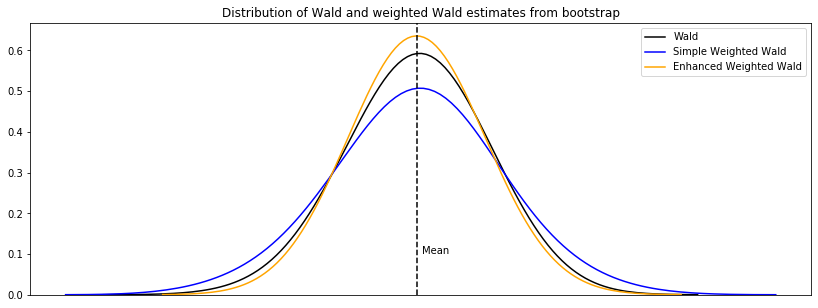

In [44]:
#Shift all estimators' means toward Wald estimator's mean for easy comparison of variances
wald_wght_bstr2_shift = wald_wght_bstr2 + np.mean(wald_bstr) - np.mean(wald_wght_bstr2)
wald_wght_new_bstr2_shift = wald_wght_new_bstr2 + np.mean(wald_bstr) - np.mean(wald_wght_new_bstr2)

#Plot estimates
plt.figure(figsize = (14,5))
sns.kdeplot(wald_bstr, bw=0.5, color = 'black', label = 'Wald')
sns.kdeplot(wald_wght_bstr2_shift, bw=0.5, color = 'blue', label = 'Simple Weighted Wald')
sns.kdeplot(wald_wght_new_bstr2_shift, bw=0.5, color = 'orange', label = 'Enhanced Weighted Wald')

plt.axvline( x= np.mean(wald_bstr),color='black', ls = "--")
plt.text(x = np.mean(wald_bstr) + 0.05, y = 0.1, s = 'Mean',color = 'black')

plt.title("Distribution of Wald and weighted Wald estimates from bootstrap")
plt.xticks([])
plt.show()

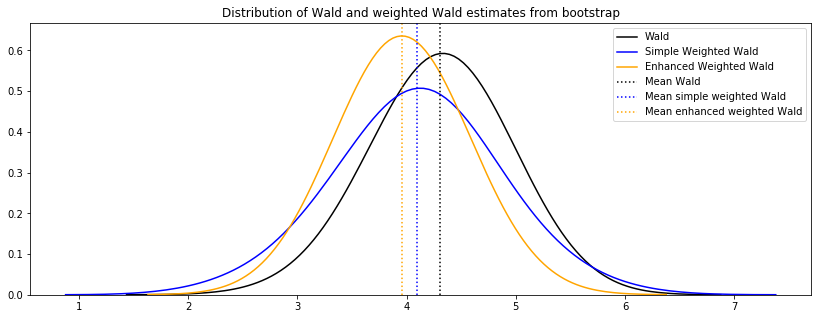

In [45]:
#Plot estimates
plt.figure(figsize = (14,5))
sns.kdeplot(wald_bstr, bw=0.5, color = 'black', label = 'Wald')
sns.kdeplot(wald_wght_bstr2, bw=0.5, color = 'blue', label = 'Simple Weighted Wald')
sns.kdeplot(wald_wght_new_bstr2, bw=0.5, color = 'orange', label = 'Enhanced Weighted Wald')

plt.axvline( x= np.mean(wald_bstr),color='black', ls = ":", label = 'Mean Wald')
plt.axvline( x= np.mean(wald_wght_bstr2),color='blue', ls = ":", label = 'Mean simple weighted Wald')
plt.axvline( x= np.mean(wald_wght_new_bstr2),color='orange', ls = ":", label = 'Mean enhanced weighted Wald')
plt.legend()

plt.title("Distribution of Wald and weighted Wald estimates from bootstrap")
#plt.xticks([])
plt.show()